### Part 1: Load Basic Libraries

In [1]:
import requests
import zipfile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Part 2: Load Dataset

In [ ]:
#!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
# Make an HTTP GET request to the URL of the ZIP file

# Download the ZIP file:

url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
response = requests.get(url)

with open("temp.zip", "wb") as f:
    f.write(response.content)
    

In [ ]:
# Extract the ZIP file:
with zipfile.ZipFile("temp.zip", "r") as zip_ref:
    zip_ref.extractall("extracted_file")

In [2]:
csv_file = 'extracted_file/bank/bank-full.csv'
df = pd.read_csv(csv_file, sep=';')

In [3]:
len(df)

45211

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.y = (df.y == 'yes').astype(int)

In [6]:
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object

In [7]:
 hwdf = ['age', 'job', 'marital', 'education', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']


In [8]:
df[hwdf]


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [9]:
df[hwdf].dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object

### Part 3: Data Preparation


In [10]:
df[hwdf].head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [11]:
# Basic information and summary statistics
print(df[hwdf].info())
print(df[hwdf].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(8)
memory usage: 5.3+ MB
None
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.00

In [12]:
# Calculate the median for RAM
mode_of_education = df['education'].mode()[0]  # mode() returns a Series, so we select the first mode

print(f"The mode of education is: {mode_of_education}")

The mode of education is: secondary


### Part 4: EDA & Target Variable Analysis

In [13]:
df[hwdf].dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object

In [14]:
numerical = ['age','balance','day','duration','campaign','pdays','previous']
categorical = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
print(len(df))
print(len(df_train_full))
print(len(df_test))

45211
36168
9043


In [18]:
len(df_train_full) + len(df_test)

45211

In [19]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [20]:
print(len(df_val))

9042


In [21]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [22]:
y_train = df_train.y.values
y_val = df_val.y.values

In [23]:
del df_train['y']
del df_val['y']

In [24]:
df_train_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


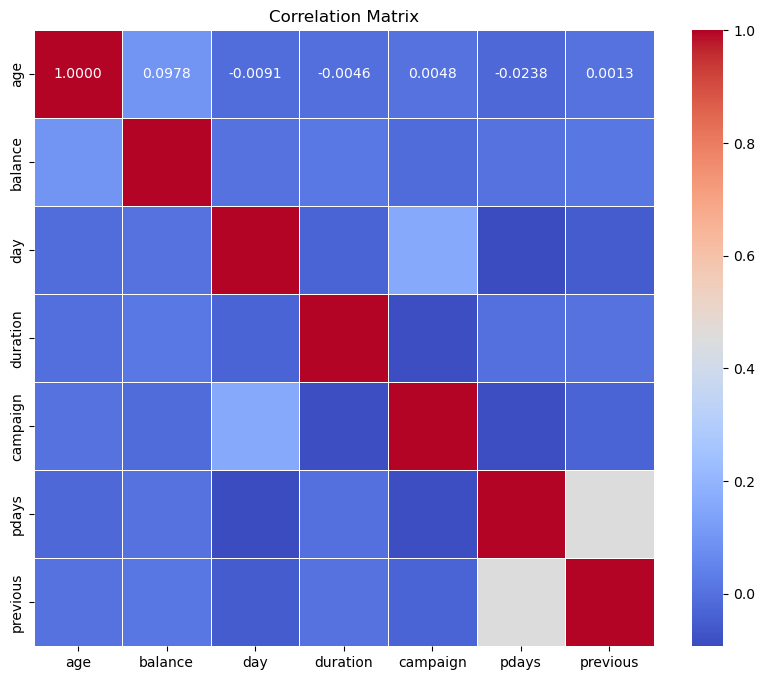

In [25]:
corr_matrix = df[numerical].corr()

# Display the correlation matrix
print(corr_matrix)

# Optionally, visualize the correlation matrix using a heatmap for better insights
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
# 3. Find the two features with the highest correlation (ignoring self-correlation)
# Unstack the correlation matrix into a series
corr_pairs = corr_matrix.abs().unstack()

In [27]:

# Drop the self-correlations (correlation of a feature with itself)
corr_pairs = corr_pairs[corr_pairs != 1]

In [28]:

# Sort the correlations in descending order
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

In [29]:
# Get the top 2 features with the highest correlation
highest_corr = sorted_corr_pairs.head(1)


In [30]:
print(f"The two features with the highest correlation are:\n{highest_corr}")

The two features with the highest correlation are:
previous  pdays    0.45482
dtype: float64


### Part 5: Data Preprocessing

In [31]:
from sklearn.metrics import mutual_info_score

In [33]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.y)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
poutcome,0.029257
month,0.024774
contact,0.014164
housing,0.009800
job,0.007765


,MI
housing,0.009800
job,0.007765
loan,0.002509
education,0.002458
marital,0.002019


### Part 6: Model Selection & Training

### One-Hot Encoding


In [34]:
from sklearn.feature_extraction import DictVectorizer

In [35]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [36]:
train_dict[0]

{'job': 'housemaid',
 'marital': 'divorced',
 'education': 'secondary',
 'housing': 'yes',
 'loan': 'no',
 'contact': 'cellular',
 'month': 'nov',
 'poutcome': 'other',
 'age': 37,
 'balance': 1040,
 'day': 21,
 'duration': 567,
 'campaign': 1,
 'pdays': 184,
 'previous': 1}

In [37]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [38]:
X_train = dv.transform(train_dict)

In [41]:
X_train.shape

(27126, 49)

In [43]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'loan=no', 'loan=yes', 'marital=divorced',
       'marital=married', 'marital=single', 'month=apr', 'month=aug',
       'month=dec', 'month=feb', 'month=jan', 'month=jul', 'month=jun',
       'month=mar', 'month=may', 'month=nov', 'month=oct', 'month=sep',
       'pdays', 'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

### Training Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [46]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [47]:
model.predict_proba(X_val)

array([[0.85716101, 0.14283899],
       [0.96719762, 0.03280238],
       [0.95250335, 0.04749665],
       ...,
       [0.98098731, 0.01901269],
       [0.93827637, 0.06172363],
       [0.96640548, 0.03359452]])

In [48]:
y_pred = model.predict_proba(X_val)[:, 1]

In [49]:
y_pred

array([0.14283899, 0.03280238, 0.04749665, ..., 0.01901269, 0.06172363,
       0.03359452])

In [50]:
y = y_pred > 0.5

In [51]:
(y_val == y).mean()

0.9021234240212342

In [ ]:
# First, split the dataset into a combined train and temp set (80%) and a test set (20%)
train_val, test = train_test_split(df, test_size=0.2, random_state=45, shuffle=True)

# Then, split the train_val set into the train set (60%) and the validation set (20%)
train, val = train_test_split(train_val, test_size=0.25, random_state=42, shuffle=True)  # 0.25 of 80% equals 20%

